# League of Legends Diamond Ranked Games (10 min)

- My site [skillcraft](https://skillcraft.codes)
- This dataset [Kaggle](https://www.kaggle.com/bobbyscience/league-of-legends-diamond-ranked-games-10-min)
- [Decision Classification Trees](https://www.datacamp.com/community/tutorials/decision-tree-classification-python)
- Thanks for viewing

Basic Machine Learning


In [59]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [60]:
df = pd.read_csv('data/high_diamond_ranked_10min.csv')

In [78]:
df.columns

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

In [86]:
feature_cols=['blueWardsPlaced', 'blueWardsDestroyed',
              'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
              'blueEliteMonsters', 'blueDragons', 'blueHeralds',
              'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
              'blueTotalExperience', 'blueTotalMinionsKilled',
              'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
              'blueCSPerMin', 'blueGoldPerMin']

In [87]:
x=df[feature_cols]
y=df.blueWins
labels=['win','loss']

In [88]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [93]:
clf=DecisionTreeClassifier(criterion="entropy",max_depth=3)
clf=clf.fit(x_train,y_train)

In [94]:
y_pred = clf.predict(x_test)

In [95]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7199730094466936


Help with [Plotting Decision Classification](https://towardsdatascience.com/introduction-to-decision-tree-classifiers-from-scikit-learn-32cd5d23f4d)

In [96]:
#import relevant functions
from sklearn.tree import export_text
#export the decision rules
tree_rules = export_text(clf,
                        feature_names = list(feature_cols))
#print the result
print(tree_rules)

|--- blueGoldDiff <= 649.50
|   |--- blueGoldDiff <= -1431.50
|   |   |--- blueGoldDiff <= -3078.00
|   |   |   |--- class: 0
|   |   |--- blueGoldDiff >  -3078.00
|   |   |   |--- class: 0
|   |--- blueGoldDiff >  -1431.50
|   |   |--- blueGoldDiff <= -644.00
|   |   |   |--- class: 0
|   |   |--- blueGoldDiff >  -644.00
|   |   |   |--- class: 0
|--- blueGoldDiff >  649.50
|   |--- blueGoldDiff <= 1961.50
|   |   |--- blueExperienceDiff <= 1459.50
|   |   |   |--- class: 1
|   |   |--- blueExperienceDiff >  1459.50
|   |   |   |--- class: 1
|   |--- blueGoldDiff >  1961.50
|   |   |--- blueExperienceDiff <= 2545.50
|   |   |   |--- class: 1
|   |   |--- blueExperienceDiff >  2545.50
|   |   |   |--- class: 1



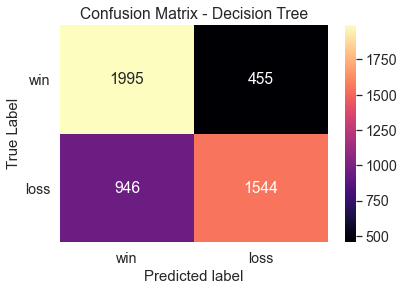

<Figure size 720x504 with 0 Axes>

In [69]:
#import the relevant packages
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
#get the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test,
                                            y_pred)
#turn this into a dataframe
matrix_df = pd.DataFrame(confusion_matrix)
#plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")
#set axis titles
ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_xticklabels(labels)
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(list(labels), rotation = 0)
plt.show()